In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import time
import random

In [4]:
%%time
# Loading the data
names=['ID','diagnosis']
for i in range(30):
    names.append('feature_{}'.format(i))
df_wdbc=pd.read_csv('wdbc.data',header=None,names=names)

Wall time: 11 ms


In [3]:
df_wdbc.head()

,ID,diagnosis,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_wdbc.shape

(569, 32)

In [5]:
df_wdbc.describe()

,ID,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


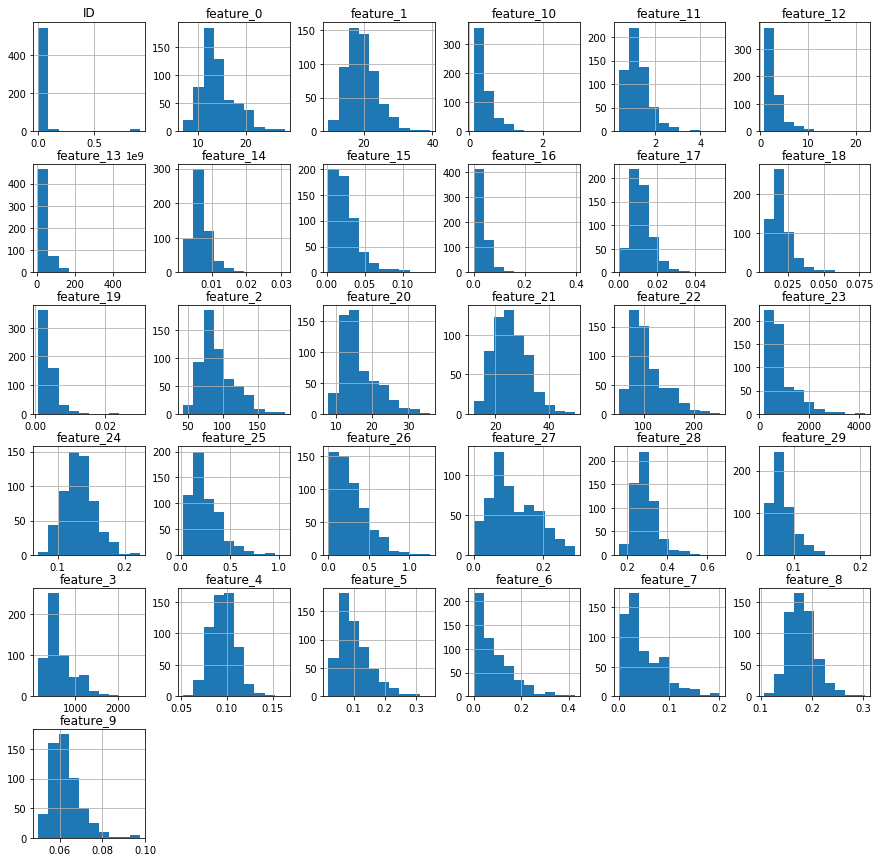

In [6]:
#data visualize
p = df_wdbc.hist(figsize = (15,15))

In [5]:
'''Mean normalization'''
def mean_deviation_scale(data,expect_mean=0,expect_diviation=1):
    array = data.copy()
    if len(array.shape)==1:
        return (array-np.mean(array))/np.std(array)*expect_diviation+expect_mean
    
    for i in range(len(array.T)):
        column = array.T[i]
        array.T[i] = (column-np.mean(column))/(np.std(column))*expect_diviation+expect_mean
    return array

In [6]:
#data scaling
bcs = mean_deviation_scale(df_wdbc.iloc[:,2:])
#choose data to do SVM
bcs.columns = list(df_wdbc.iloc[:,2:].columns)
bcs['diagnosis'] = df_wdbc['diagnosis']

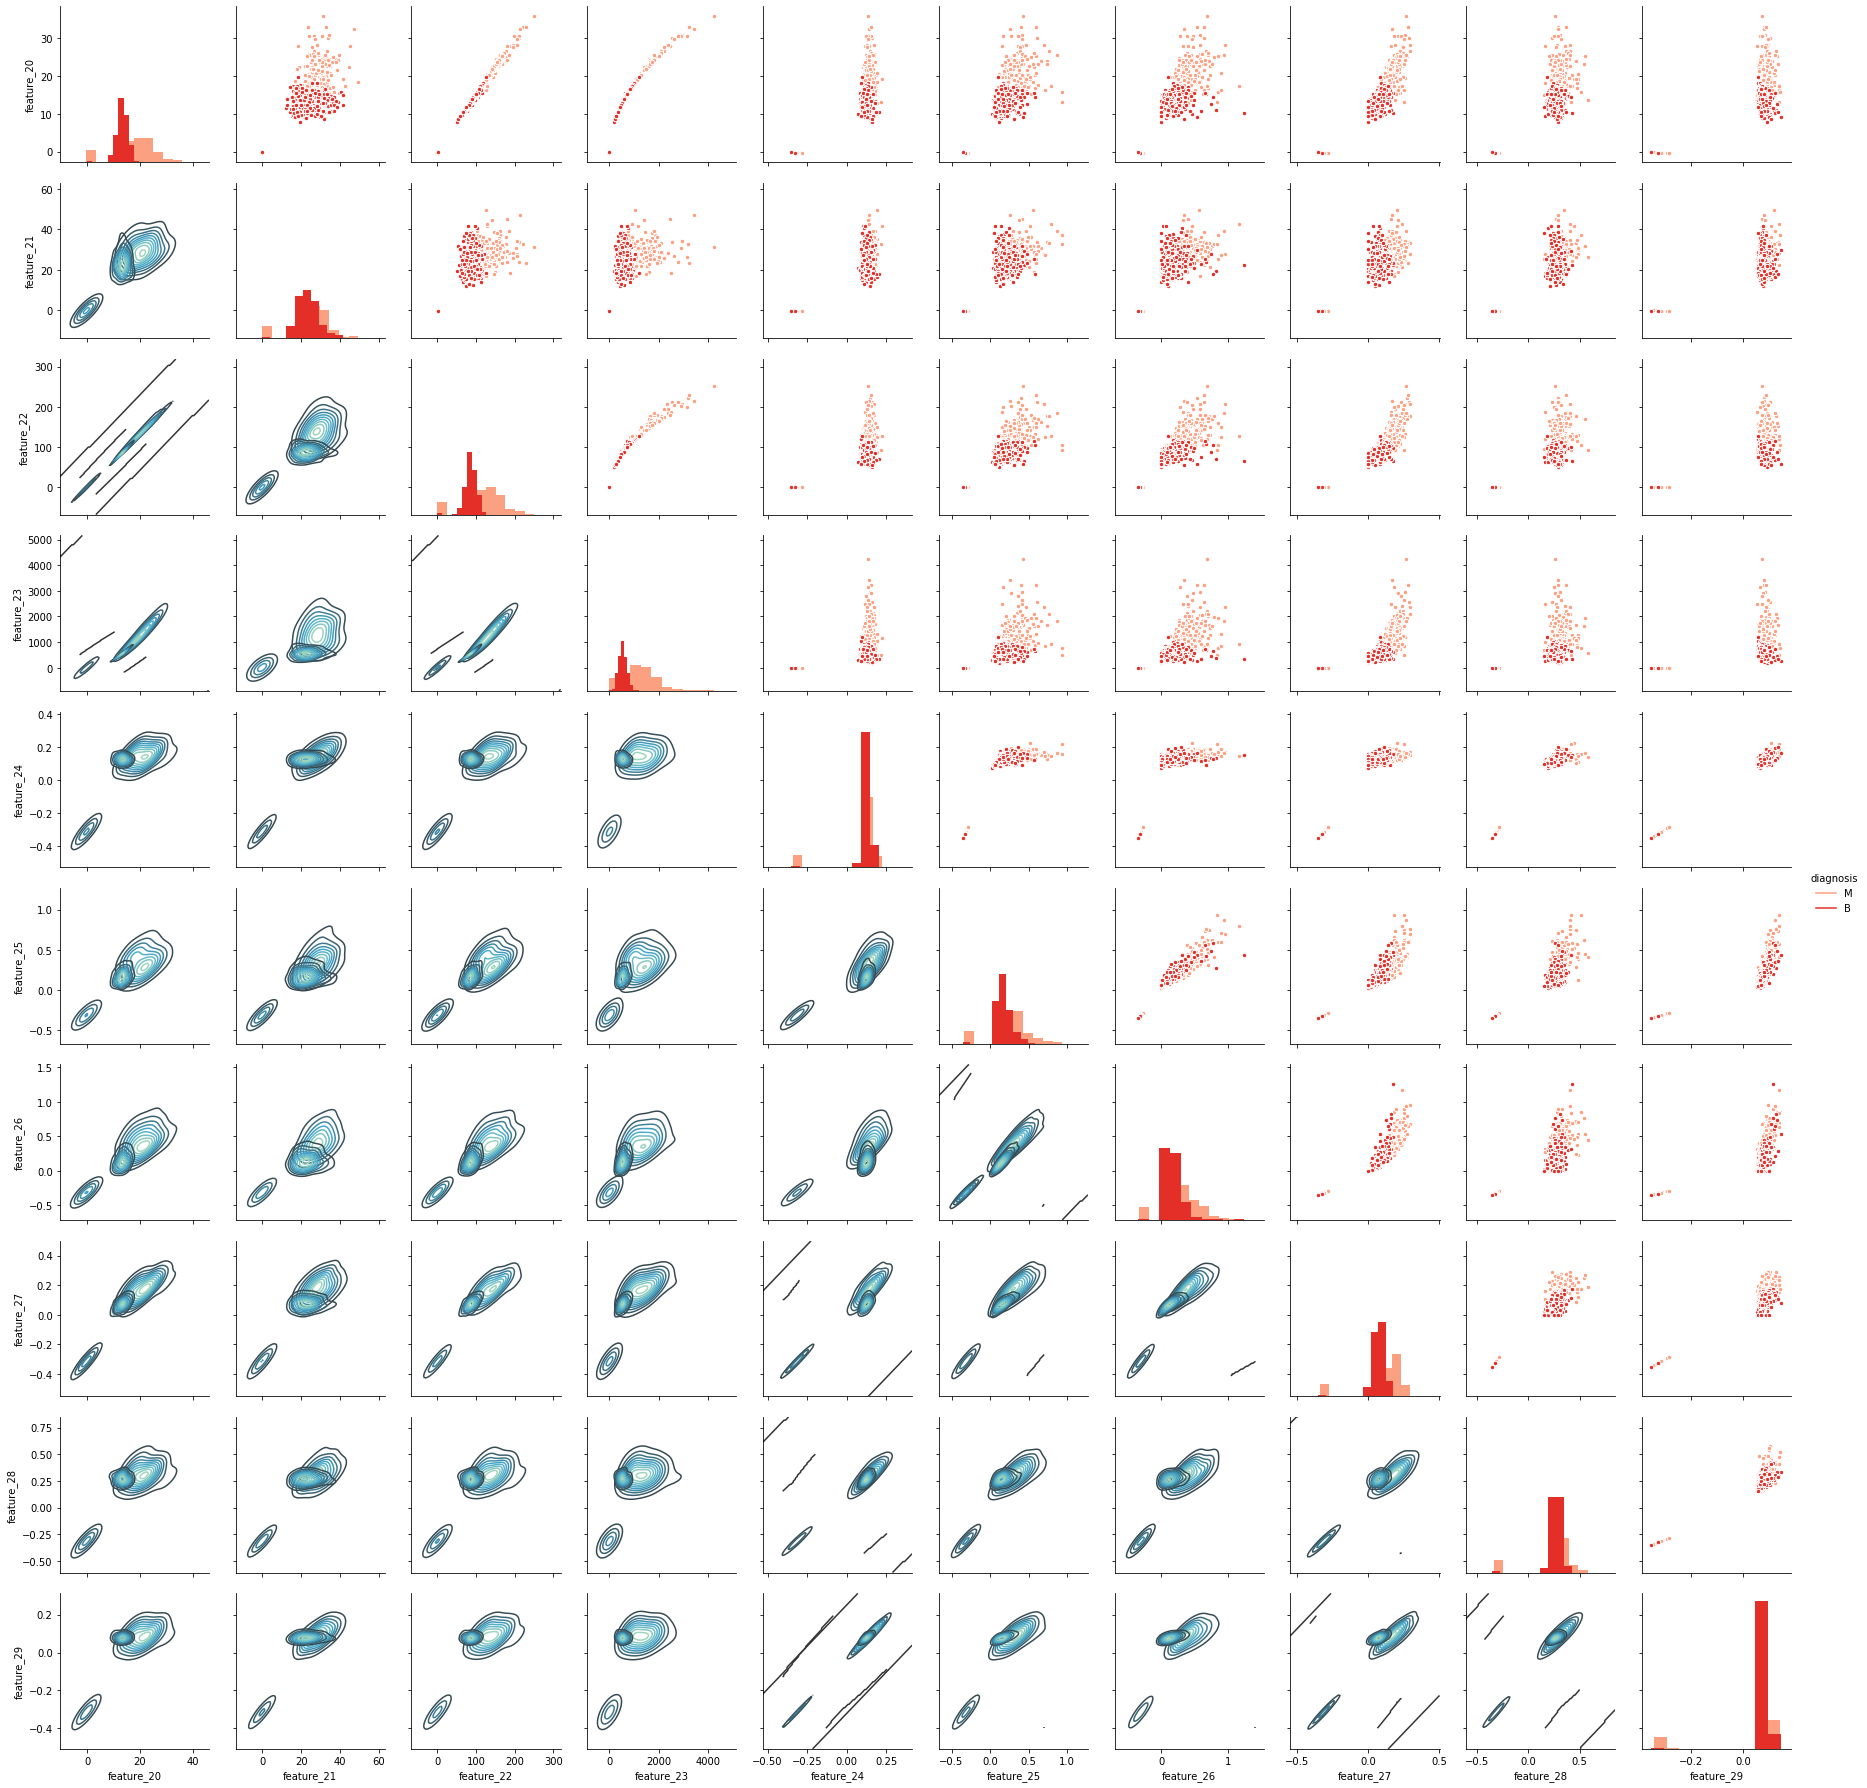

In [8]:
draw = bcs.iloc[:,20:]

p = sns.PairGrid(draw,hue = 'diagnosis',palette = 'Reds')
p.map_upper(plt.scatter,s=20,edgecolor = 'w')
p.map_diag(plt.hist)
p.map_lower(sns.kdeplot,cmap='GnBu_d')
p.add_legend()

p.figsize = (30,30)

In [10]:
def randomSelect(i,N):
    j=i
    while(j==i):
        j=int(np.random.uniform(0,N))
    return j
        

In [11]:
def clipAlpha(alpha,high,low):
    if alpha > high:
        alpha = high
    if alpha <low:
        alpha = low
    return alpha

In [12]:
def SMO(data,labels,C,iterationNum,toler):
    m,n = np.shape(data)
    b = 0
    alphas = np.zeros(m)
    iteration = 0
    
    kernel = np.zeros((m,m))
    for i in range(m):
        for j in range(m):
            kernel[i][j] = np.sum(data[i]*data[i])
        
    while iteration<iterationNum:
        iteration+=1
        #y = w^T * x[i] +b
        #w = Σ(i = 1-m) alphas[i]*labels[i]*x[i]
        for i in range(m):
            w = np.zeros(n)
            for k in range(m):
                w+=alphas[k]*labels[k]*data[k]
                
            yi = labels[i]
            fxi = np.sum(w*data[i])+b
            
            Ei = fxi-(float)(yi)
            #KKT
            #ai=0 <=>yi*f(xi)>=1 inside
            #0<ai<C <=> yi*f(xi)=1 on boudary
            #ai=C <=> yI*f(xi)<=1 between
            
            #if KKT is not satisfied, we need to update alphas[i]
            if (yi*Ei<-toler and alphas[i]<C) or (yi*Ei > toler and alphas[i] > 0):
                #choose another alphas[j] to update together
                j = randomSelect(i,m)
                yj = labels[j]
                fxj = np.sum(w*data[j])+b
                Ej = fxj-(float)(yj)
                
                alphaI = alphas[i].copy()
                alphaJ = alphas[j].copy()
                
                
                #bound for new a[j]
                if(yi!=yj):
                    low = max(0,alphaJ-alphaI)
                    high = min(C,C+alphaJ-alphaI)
                else:
                    low = max(0,alphaI+alphaJ-C)
                    high = min(C,alphaI+alphaJ)
                if low==high:
                    continue
            
                #update a[j]
                #eta = K(x1,x1)+K(x2,x2)-2K(x1,x2)
                eta = np.sum(data[i]*data[i])+np.sum(data[j]*data[j])-2.0*np.sum(data[i]*data[j])
                if eta<=0:
                    continue
                alphas[j] +=yj*(Ei-Ej)/eta
                alphas[j] = clipAlpha(alphas[j],high,low)
                if(abs(alphas[j] - alphaJ)<1e-3):
                    continue
                    
            
                #update a[i]
                alphas[i] +=yi*yj*(alphaJ - alphas[j])
            
                #update b
                a1update = alphas[i]-alphaI
                a2update = alphas[j]-alphaJ
                kx1_x1 = kernel[i][i]#np.sum(data[i]*data[i])
                kx1_x2 = kernel[i][j]#np.sum(data[i]*data[j])
                kx2_x2 = kernel[j][j]#np.sum(data[j]*data[j])
                
                b1 = b-Ei-yi*a1update*kx1_x1-yj*a2update*kx1_x2
                b2 = b-Ej-yi*a1update*kx1_x2-yj*a2update*kx2_x2
            
                if 0<alphas[i] and alphas[i]<C:
                    b = b1
                elif 0<alphas[j] and alphas[j]<C:
                    b = b2
                else:
                    b = (b1+b2)/2.0
            
    w = np.zeros(n)
    for j in range(m):
        w+=alphas[j]*labels[j]*data[j]
        
    return b,w

In [13]:
#bcs = bcs[:30]
X = bcs.iloc[:,:30]
y = bcs['diagnosis']
class_names = list(y.unique())

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state = 5)

In [15]:
'''
%%time
svc = SVC(kernel = 'linear',C=1,gamma=.1,probability = True)
svc.fit(X,y)
y_pred = svc.fit(X_train,y_train).predict(X_test)
t = pd.DataFrame(svc.predict_proba(X_test))
print ("train score: "),
print (svc.score(X_train,y_train))
print ("test score: "),
print (svc.score(X_test,y_test))
'''

'\n%%time\nsvc = SVC(kernel = \'linear\',C=1,gamma=.1,probability = True)\nsvc.fit(X,y)\ny_pred = svc.fit(X_train,y_train).predict(X_test)\nt = pd.DataFrame(svc.predict_proba(X_test))\nprint ("train score: "),\nprint (svc.score(X_train,y_train))\nprint ("test score: "),\nprint (svc.score(X_test,y_test))\n'

In [16]:
#set B = true, M = false
y_labels = np.where(y_train.values=='B', 1, y_train.values)
y_labels = np.where(y_labels=='M', -1, y_labels)

In [17]:
%%time
b,w = SMO(X_train.values,y_labels,1,10000,0.001)

CPU times: user 2h 26min 14s, sys: 5.54 s, total: 2h 26min 20s
Wall time: 2h 26min 15s


In [18]:
#prediction
y_pred_binary = np.sign(X_test.values.dot(w)+b)
y_pred = np.where(y_pred_binary==1,'B',y_pred_binary)
y_pred = np.where(y_pred_binary==-1,'M',y_pred)

In [19]:
def score(pred,actual):
    correct = 0
    for i in range(len(pred)):
        if(pred[i]==actual[i]):
            correct+=1
    return correct*1.0/len(pred)  

In [20]:
def plot_confusion_matrix(cm,classes,normalize=False,title = 'Confusion Matrix',cmap = plt.cm.Blues):
    plt.figure()
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Non-Normalized confusion matrix")
    print(cm)
    
    thresh = cm.max()/2
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
            horizontalalignment = "center",
            color = "white" if cm[i,j]>thresh else "black")
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [21]:
def confusion_matrix(test,pred):
    assert (len(test)==len(pred))
    m = len(test)
    matrix = np.zeros((2,2),int)
    for i in range(m):
        if test[i]=='B':
            if pred[i]==test[i]:
                matrix[0][0]+=1
            else:
                matrix[1][0]+=1
        else:
            if pred[i]==test[i]:
                matrix[1][1]+=1
            else:
                matrix[0][1]+=1
    return matrix


Accuracy is: 0.9308510638297872
Non-Normalized confusion matrix
[[119  10]
 [  3  56]]
Normalized confusion matrix
[[0.92 0.08]
 [0.05 0.95]]


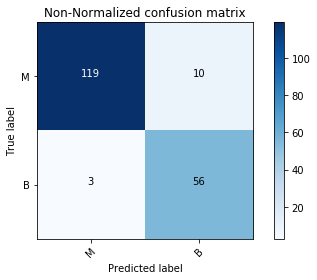

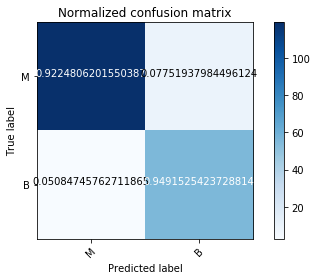

In [22]:
#accuracy
print("Accuracy is:",score(y_pred,y_test.values))

#confusion matrix
mtrx = confusion_matrix(y_test.values,y_pred)

np.set_printoptions(precision=2)
plot_confusion_matrix(mtrx,classes=class_names,title = 'Non-Normalized confusion matrix')
plot_confusion_matrix(mtrx,classes=class_names,normalize =True,title = 'Normalized confusion matrix')